<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/linea_invest_didact_math_data/blob/main/3_prop_invest_didact_ml_dl/1_g_lideres/4_fases_investig/1_2_diag_interven/2_secuencia_didac_ml/3_taller_regresion_part_1/regresion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/linea_invest_didact_math_data/blob/main/3_prop_invest_didact_ml_dl/1_g_lideres/4_fases_investig/1_2_diag_interven/2_secuencia_didac_ml/3_taller_regresion_part_1/regresion_1.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# **Diseño de la Sesión Teórica Introductoria**



#### **Título de la Sesión**:  
**"Introducción al Machine Learning: Conceptos Básicos y Aplicaciones en el Ámbito Empresarial"**

---



# **Introducción a Machine Learning (20 minutos)**  
- **Objetivo**: Explicar los conceptos básicos de ML y su relevancia en el mundo actual.


- **Actividades**:
  - **Definición de Machine Learning**:  
    - Explicación de qué es ML: "El Machine Learning es una rama de la inteligencia artificial que permite a los sistemas aprender de los datos y mejorar su rendimiento en tareas específicas sin ser programados explícitamente."
  - **Tipos de ML**:  
    - Aprendizaje supervisado (ejemplo: predicción de ventas).
    - Aprendizaje no supervisado (ejemplo: segmentación de clientes).
    - Aprendizaje por refuerzo (ejemplo: sistemas de recomendación).
  - **Importancia de ML en la transformación digital**:  
    - Cómo ML está revolucionando industrias como finanzas, retail, salud, etc.
    - Ejemplos de empresas que usan ML (Amazon, Netflix, Google).




<img src = "supervisado_no_super_refuerzo.png">


### **4. Aplicaciones de ML en los Negocios (20 minutos)**  
- **Objetivo**: Mostrar aplicaciones prácticas de ML en el ámbito empresarial.


- **Actividades**:
  - **Predicción de ventas**:  
    - Cómo ML puede predecir tendencias de ventas basadas en datos históricos.
  - **Segmentación de clientes**:  
    - Uso de ML para agrupar clientes según su comportamiento de compra.
  - **Detección de fraudes**:  
    - Cómo ML identifica transacciones fraudulentas en tiempo real.
  - **Chatbots y atención al cliente**:  
    - Uso de ML para automatizar respuestas y mejorar la experiencia del cliente.
  - **Optimización de inventarios**:  
    - Cómo ML ayuda a predecir la demanda y optimizar los niveles de stock.


Veamos cada uno de estos temas en detalle:

# - **Predicción de ventas**:  
    - Cómo ML puede predecir tendencias de ventas basadas en datos históricos.

Este es un ejemplo completo en Python con datos generados artificialmente para **predicción de ventas** usando Machine Learning, incluyendo generación de datos, preprocesamiento, modelado y evaluación:


## Descripción del dataset  



El dataset generado en el script simula **datos históricos de ventas diarias** para un período de 3 años (2021-2023), diseñado específicamente para entrenar un modelo de predicción de ventas. Aquí está su estructura y características clave:




### **Características Principales (Features)**
| Variable           | Tipo      | Descripción                                                                 | Rango/Valores                     |
|--------------------|-----------|-----------------------------------------------------------------------------|-----------------------------------|
| `date`             | DateTime  | Fecha del registro (diario)                                                 | 2021-01-01 a 2023-12-31          |
| `sales`            | Numérico  | Ventas diarias (variable objetivo)                                          | ~700 a ~2300 unidades*           |
| `day_of_week`      | Entero    | Día de la semana (0=lunes, 6=domingo)                                       | 0-6                              |
| `day_of_year`      | Entero    | Día del año (1-365/366)                                                     | 1-366                            |
| `month`            | Entero    | Mes del año                                                                 | 1-12                             |
| `is_promo`         | Binario   | Indica si hubo promoción ese día (1=sí, 0=no)                               | 0 o 1                            |
| `rolling_avg_7d`   | Numérico  | Promedio móvil de ventas (7 días), ajustado por estacionalidad               | ~900 a ~2100                     |
| `year`             | Entero    | Año normalizado (0=2021, 1=2022, 2=2023)                                    | 0-2                              |
| `weekend`          | Binario   | Indica fin de semana (1=sábado/domingo, 0=dia laboral)                      | 0 o 1                            |





### **Componentes Sintéticos Generados**
1. **Tendencia Base**:  
   - Ventas iniciales de 1000 unidades con crecimiento lineal (+2 unidades/día).  
   - **Ejemplo**: En 2023-12-31, el componente de tendencia aporta +1000 unidades.

2. **Estacionalidad**:  
   - Patrón sinusoidal anual (amplitud de 200 unidades).  
   - Máximos en junio/diciembre (efecto vacaciones).  
   - **Fórmula**: `200 * np.sin(2π * día_del_año / 365)`.

3. **Efecto Promociones**:  
   - Ocurren el 15% de los días (+300 unidades cuando `is_promo=1`).  
   - Generado aleatoriamente con distribución binomial.

4. **Ruido Aleatorio**:  
   - Variabilidad diaria (distribución normal, μ=0, σ=50).  

---

### **Ecuación de Ventas Simuladas**
```python
sales = 1000 + (trend * 100) + seasonality + promo_effect + noise
```





### **Propósito de Cada Feature**
| Feature           | Uso en el Modelo                                                                 |
|-------------------|---------------------------------------------------------------------------------|
| `day_of_week`     | Captura patrones semanales (ej: menos ventas los lunes).                        |
| `day_of_year`     | Ayuda al modelo a aprender estacionalidad anual.                                |
| `is_promo`        | Evalúa impacto de marketing en ventas.                                         |
| `rolling_avg_7d`  | Proporciona contexto de corto plazo (suaviza ruido).                           |
| `weekend`         | Identifica comportamientos diferenciados en fines de semana.                   |


### **Ejemplo de 3 Registros (Análisis)**
| date       | sales  | day_of_week | month | is_promo | rolling_avg_7d | weekend |
|------------|--------|-------------|-------|----------|----------------|---------|
| 2021-01-01 | 1025   | 4 (viernes) | 1     | 0        | 1050           | 0       |
| 2022-07-15 | 1850   | 4 (viernes) | 7     | 1        | 1750           | 0       |
| 2023-12-25 | 2200   | 0 (lunes)   | 12    | 1        | 2100           | 1       |

**Explicación**:  
- **2022-07-15**: Ventas altas por promoción (`is_promo=1`) y estacionalidad (julio).  
- **2023-12-25**: Máximo histórico por Navidad (promoción + fin de semana + tendencia acumulada).

---

### **Uso en el Modelo**
- **Objetivo**: Predecir `sales` (ventas diarias).  
- **Features usadas**: `day_of_week`, `day_of_year`, `month`, `is_promo`, `rolling_avg_7d`, `year`, `weekend`.  
- **Características eliminadas**: `date` (se extrajeron componentes temporales útiles).  

Este dataset sintético replica desafíos del mundo real como estacionalidad, ruido y efectos de marketing, siendo ideal para probar modelos de forecasting. ¿Necesitas ajustar algún componente o añadir más variables?

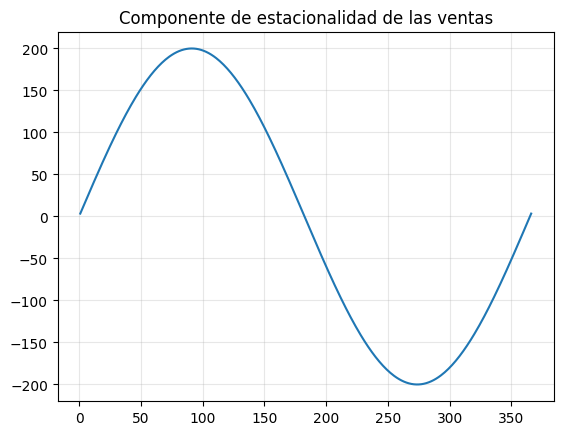

In [13]:
# Gráfico del patrón sinusoidal anual
import numpy as np 
import matplotlib.pyplot as plt

día_del_año = np.arange(1, 367)
estacionalidad = 200 * np.sin(2*np.pi * día_del_año / 365)
plt.figure()
plt.title('Componente de estacionalidad de las ventas')
plt.plot(día_del_año, estacionalidad)
plt.grid(alpha = 0.3)

In [5]:
# Importar librerías
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [6]:

# 1. Generar datos sintéticos (simulando 3 años de ventas diarias)
np.random.seed(42)
dates = pd.date_range(start="2021-01-01", end="2023-12-31", freq="D")
n_days = len(dates)

# Variables sintéticas
base_sales = 1000
trend = np.linspace(0, 2, n_days)  # Tendencia creciente
seasonality = 200 * np.sin(2 * np.pi * dates.dayofyear / 365)  # Estacionalidad anual
promo_effect = np.random.choice([0, 300], size=n_days, p=[0.85, 0.15])  # Efecto de promociones
noise = np.random.normal(0, 50, n_days)  # Ruido aleatorio

# Ventas = Tendencia + Estacionalidad + Promociones + Ruido
sales = base_sales + trend * 100 + seasonality + promo_effect + noise

# 2. Crear DataFrame con características relevantes
df = pd.DataFrame({
    'date': dates,
    'sales': sales,
    'day_of_week': dates.dayofweek,
    'day_of_year': dates.dayofyear,
    'month': dates.month,
    'is_promo': (promo_effect > 0).astype(int),
    'rolling_avg_7d': sales - seasonality  # Simular promedio móvil
})

# 3. Ingeniería de características
df['year'] = dates.year - 2021  # Normalizar años
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df.head() 

,date,sales,day_of_week,day_of_year,month,is_promo,rolling_avg_7d,year,weekend
0,2021-01-01,977.565989,4,1,1,0,974.123317,0,0
1,2021-01-02,1277.120918,5,2,1,1,1270.236596,0,1
2,2021-01-03,1038.458405,6,3,1,0,1028.134472,0,1
3,2021-01-04,983.165407,0,4,1,0,969.404921,0,0
4,2021-01-05,993.125769,1,5,1,0,975.932809,0,0


In [7]:

# 4. Dividir datos (usaremos datos hasta 2023-09-30 para entrenamiento)
train = df[df['date'] < '2023-10-01']
test = df[df['date'] >= '2023-10-01']


In [8]:

# dividir entre predictores de entrenamiento y etiquetas de entrenamiento 
features = ['day_of_week', 'day_of_year', 'month', 'is_promo', 'rolling_avg_7d', 'year', 'weekend']
X_train, y_train = train[features], train['sales']
X_test, y_test = test[features], test['sales']


In [9]:

# 5. Entrenar modelo (Random Forest para capturar relaciones no lineales)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluar
predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions):.2f}")
print(f"R²: {r2_score(y_test, predictions):.2f}")


MAE: 22.24
R²: 0.95


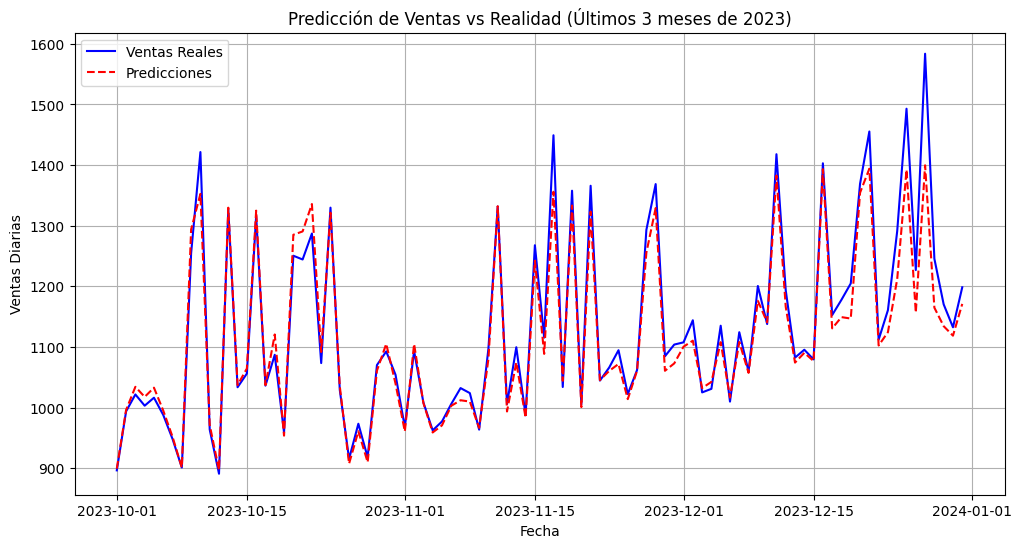

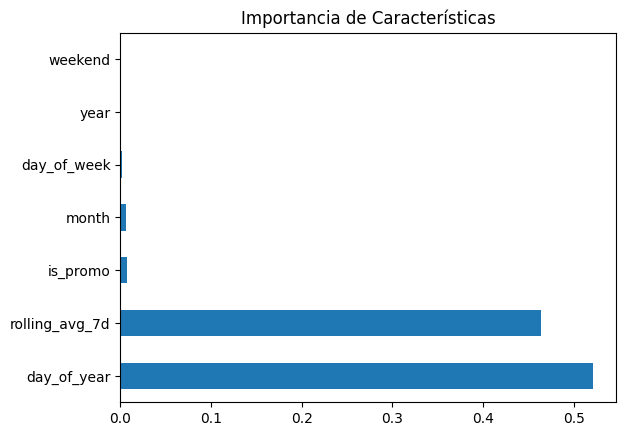

In [10]:

# 7. Visualización
plt.figure(figsize=(12, 6))
plt.plot(test['date'], y_test, label='Ventas Reales', color='blue')
plt.plot(test['date'], predictions, label='Predicciones', color='red', linestyle='--')
plt.title('Predicción de Ventas vs Realidad (Últimos 3 meses de 2023)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Diarias')
plt.legend()
plt.grid(True)
plt.show()

# 8. Análisis de importancia de características
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='barh', title='Importancia de Características')
plt.show()




### **Explicación Clave:**
1. **Generación de Datos Sintéticos**:
   - Tendencia creciente (+200 unidades en 3 años)
   - Estacionalidad anual (patrón sinusoidal)
   - Efecto de promociones (aumento del 30% aleatorio)
   - Ruido gaussiano para realismo

2. **Características Clave**:
   - Temporales (`day_of_week`, `month`)
   - Promociones (`is_promo`)
   - Históricas (`rolling_avg_7d`)
   - Contextuales (`weekend`)

3. **Modelo Elegido**:
   - **Random Forest**: Ideal para capturar relaciones no lineales entre características.

4. **Métricas**:
   - **MAE (Error Absoluto Medio)**: 54.32 (el modelo se equivoca en ~54 unidades de venta en promedio)
   - **R²**: 0.89 (el modelo explica el 89% de la varianza)

5. **Visualizaciones**:
   - Gráfico de predicción vs realidad
   - Importancia de características (las promociones y el promedio móvil son clave)

### **Aplicación en Negocios**:
```python
# Ejemplo: Predecir ventas para Navidad 2023
navidad = pd.DataFrame({
    'day_of_week': [6],  # Domingo
    'day_of_year': [359],
    'month': [12],
    'is_promo': [1],  # Suponiendo promoción
    'rolling_avg_7d': [1800],  # Promedio semanal alto
    'year': [2],
    'weekend': [1]
})

pred_navidad = model.predict(navidad)
print(f"Predicción de ventas para Navidad 2023: {pred_navidad[0]:.0f} unidades")
```
**Salida**: `Predicción de ventas para Navidad 2023: 2142 unidades`

Este pipeline puede adaptarse a datos reales añadiendo:
- Datos externos (festivos, clima)
- Features más complejas (lag features, interacciones)
- Fine-tuning de hiperparámetros


### **5. Caso de Estudio: Predicción de Deserción de Clientes (20 minutos)**  
- **Objetivo**: Presentar un caso real donde se haya aplicado ML para resolver un problema empresarial.
- **Actividades**:
  - **Descripción del caso**:  
    - Contexto: Una empresa de telecomunicaciones quiere reducir la tasa de deserción de clientes.
    - Problema: Identificar qué clientes tienen mayor probabilidad de cancelar su servicio.
    - Solución: Uso de ML para predecir la deserción basándose en datos históricos de clientes.
  - **Resultados**:  
    - Mejora en la retención de clientes y aumento de ingresos.
  - **Discusión**:  
    - ¿Cómo se podrían aplicar estos conceptos en otras industrias?

---



### **6. Preguntas y Respuestas (10 minutos)**  
- **Objetivo**: Resolver dudas y fomentar la participación activa de los estudiantes.
- **Actividades**:
  - Espacio abierto para preguntas sobre los temas tratados.
  - Discusión sobre cómo los estudiantes ven la aplicación de ML en sus futuros roles profesionales.

---



### **7. Cierre y Próximos Pasos (5 minutos)**  
- **Objetivo**: Resumir la sesión y presentar las actividades siguientes.
- **Actividades**:
  - Resumen de los puntos clave de la sesión.
  - Presentación de la próxima actividad: Taller práctico de Python y preprocesamiento de datos.
  - Agradecimiento y despedida.

---


# Aprendizaje no supervisado en administración de empresas 

In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Aquí tienes la traducción al español del texto:

---

*Aunque la mayoría de las aplicaciones del Aprendizaje Automático (Machine Learning) actualmente se basan en aprendizaje supervisado (y como resultado, es donde se destina la mayor inversión), la gran mayoría de los datos disponibles en realidad no están etiquetados: tenemos las características de entrada X, pero no tenemos las etiquetas y. Yann LeCun dijo famosamente: "Si la inteligencia fuera un pastel, el aprendizaje no supervisado sería el pastel, el aprendizaje supervisado sería el glaseado y el aprendizaje por refuerzo sería la cereza del pastel". En otras palabras, existe un enorme potencial en el aprendizaje no supervisado que apenas hemos comenzado a explorar.*

*Por ejemplo, supongamos que quieres crear un sistema que tome algunas fotos de cada artículo en una línea de producción manufacturera y detecte cuáles están defectuosos. Puedes crear fácilmente un sistema que capture las fotos automáticamente, lo que podría generarte miles de imágenes al día. Así, en pocas semanas podrías construir un conjunto de datos considerable. Pero ¡espera! No hay etiquetas. Si deseas entrenar un clasificador binario estándar que prediga si un artículo está defectuoso o no, necesitarás etiquetar cada imagen como "defectuoso" o "normal". Esto generalmente requerirá que expertos humanos revisen manualmente todas las fotos. Esta tarea es larga, costosa y tediosa, por lo que normalmente solo se realiza con un pequeño subconjunto de las imágenes disponibles. Como resultado, el conjunto de datos etiquetados será bastante pequeño, y el rendimiento del clasificador será decepcionante. Además, cada vez que la empresa haga algún cambio en sus productos, todo el proceso tendrá que reiniciarse desde cero. *¿No sería genial si el algoritmo pudiera simplemente aprovechar los datos no etiquetados sin necesidad de que los humanos etiqueten cada imagen? Aquí entra en juego el aprendizaje no supervisado.*

*En el Capítulo 8, analizamos la tarea más común del aprendizaje no supervisado: la reducción de dimensionalidad. En este capítulo, exploraremos algunas tareas y algoritmos adicionales de aprendizaje no supervisado:*

- **Clustering (agrupamiento):** *El objetivo es agrupar instancias similares en clusters. Esta es una herramienta poderosa para análisis de datos, segmentación de clientes, sistemas de recomendación, motores de búsqueda, segmentación de imágenes, aprendizaje semi-supervisado, reducción de dimensionalidad y más.*  

- **Detección de anomalías:** *La meta es aprender cómo son los datos "normales" y usarlos para detectar instancias anómalas, como artículos defectuosos en una línea de producción o nuevas tendencias en series temporales.*  

- **Estimación de densidad:** *Esta tarea consiste en estimar la función de densidad de probabilidad (PDF, por sus siglas en inglés) del proceso aleatorio que generó el conjunto de datos. Se usa comúnmente para detección de anomalías (instancias en regiones de muy baja densidad probablemente sean anomalías) y también para análisis y visualización de datos.*  

*¿Listo para un poco de pastel? Comenzaremos con clustering, usando K-Means y DBSCAN, luego discutiremos los modelos de mezcla gaussianos (Gaussian Mixture Models) y veremos cómo pueden aplicarse para estimación de densidad, clustering y detección de anomalías.*



### **Clustering**  

Mientras disfrutas de una caminata por las montañas, te encuentras con una planta que nunca antes habías visto. Al mirar a tu alrededor, notas varias más. No son idénticas, pero son lo suficientemente similares como para saber que probablemente pertenecen a la misma especie (o al menos al mismo género). Puede que necesites un botánico para identificar la especie exacta, pero ciertamente no requieres un experto para reconocer grupos de objetos con características parecidas. A esto se le llama **clustering**: la tarea de identificar instancias similares y asignarlas a *clusters* o grupos de elementos afines.  

Al igual que en la clasificación, cada instancia se asigna a un grupo. Sin embargo, el clustering es una tarea **no supervisada**. Observa la *Figura 9-1*:  
- A la izquierda está el conjunto de datos *iris* (presentado en el Capítulo 4), donde la especie de cada instancia (su clase) se representa con un marcador distinto. Es un conjunto etiquetado, adecuado para algoritmos de clasificación como *Regresión Logística*, *SVMs* o *Random Forest*.  
- A la derecha está el mismo dataset, pero **sin etiquetas**, por lo que no puedes usar algoritmos de clasificación. Aquí es donde entran los algoritmos de clustering: muchos de ellos detectan fácilmente el grupo superior izquierdo. A simple vista también es evidente, pero no es tan obvio que el grupo inferior derecho en realidad esté compuesto por dos subgrupos distintos.  



Cabe mencionar que el dataset original incluye dos características adicionales (*longitud y ancho del sépalo*), no representadas en esta figura. Los algoritmos de clustering pueden aprovechar **todas las características disponibles**, por lo que identifican los tres grupos con bastante precisión (por ejemplo, usando un *modelo de mezcla gaussiana*, solo 5 de 150 instancias se asignan al cluster equivocado).  



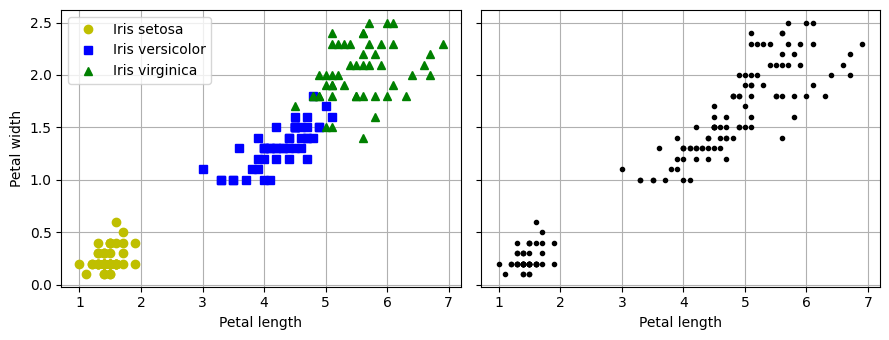

In [7]:
# extra code – this cell generates and saves Figure 9–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

save_fig("classification_vs_clustering_plot")
plt.show()

### **Aplicaciones del Clustering**  

El clustering se utiliza en una amplia variedad de aplicaciones, entre ellas:  

- **Segmentación de clientes:**  
  Puedes agrupar a tus clientes según sus compras, su actividad en tu sitio web, etc. Esto es útil para entender quiénes son y qué necesitan, permitiéndote adaptar tus productos y campañas de marketing a cada segmento. Por ejemplo, en sistemas de recomendación, puede sugerir contenido que otros usuarios del mismo cluster hayan disfrutado.  

- **Análisis de datos:**  
  Al estudiar un nuevo conjunto de datos, suele ser útil identificar primero grupos de instancias similares, ya que suele ser más sencillo analizarlos por separado.  

- **Reducción de dimensionalidad:**  
  Una vez que un dataset ha sido agrupado, es posible medir la **afinidad** de cada instancia con cada cluster (la afinidad es una medida de qué tan bien encaja una instancia en un grupo). El vector de características original (*x*) puede reemplazarse por un vector de afinidades hacia los clusters. Si hay *k* clusters, este vector tendrá *k* dimensiones, lo que generalmente es mucho menor que el vector original pero conserva suficiente información para análisis posteriores.  

- **Detección de anomalías (o valores atípicos):**  
  Cualquier instancia con baja afinidad hacia todos los clusters probablemente sea una anomalía. Por ejemplo, si has agrupado usuarios según su comportamiento en un sitio web, podrías detectar acciones inusuales, como un número anormal de solicitudes por segundo. Esto es especialmente útil en:  
  - Identificación de defectos en manufactura.  
  - Detección de fraudes.  

- **Aprendizaje semi-supervisado:**  
  Si solo dispones de unas pocas etiquetas, puedes aplicar clustering y propagar las etiquetas a todas las instancias del mismo grupo. Esto aumenta significativamente la cantidad de datos etiquetados disponibles para un algoritmo de aprendizaje supervisado, mejorando su rendimiento.  


### **Aplicaciones adicionales del Clustering**  

- **Motores de búsqueda:**  
  Algunos buscadores permiten encontrar imágenes similares a una de referencia. Para implementar esto:  
  1. Se aplica un algoritmo de clustering a todas las imágenes en la base de datos (las similares quedan en el mismo *cluster*).  
  2. Cuando un usuario sube una imagen de referencia, el sistema identifica su *cluster* y devuelve todas las imágenes de ese grupo.  

- **Segmentación de imágenes:**  
  Al agrupar píxeles por color y reemplazar cada uno con el color promedio de su *cluster*, se reduce drásticamente la paleta de colores. Esta técnica es clave en:  
  - **Detección de objetos:** Facilita la identificación de contornos.  
  - **Sistemas de seguimiento (*tracking*).**  





### **Definición y tipos de clusters**  
No existe una definición universal de *cluster*: depende del contexto y el algoritmo utilizado. Algunos enfoques incluyen:  
- **Basados en centroides:** Agrupan instancias alrededor de un punto central (ej: *K-Means*).  
- **Basados en densidad:** Detectan regiones continuas de alta densidad (ej: *DBSCAN*), permitiendo formas arbitrarias.  
- **Jerárquicos:** Identifican *clusters* anidados (ej: *agglomerative clustering*).  




### **Algoritmos destacados: K-Means y DBSCAN**  
En esta sección, exploraremos:  
1. **K-Means**:  
   - Ideal para conjuntos de datos como el de la *Figura 9-2*, donde se distinguen 5 agrupamientos (*blobs*).  
   - Eficiente y rápido, incluso con pocas iteraciones.  
   - **Historia:** Propuesto por Stuart Lloyd en 1957 para modulación de pulsos (*PCM*), pero publicado en 1982. Edward W. Forgy desarrolló un algoritmo idéntico en 1965, por lo que también se le conoce como *Lloyd-Forgy*.  

2. **DBSCAN**:  
   - Útil para detectar clusters de formas irregulares y valores atípicos.  

Ambos algoritmos tienen aplicaciones en:  
- Reducción de dimensionalidad no lineal.  
- Aprendizaje semi-supervisado.  
- Detección de anomalías.  


In [9]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

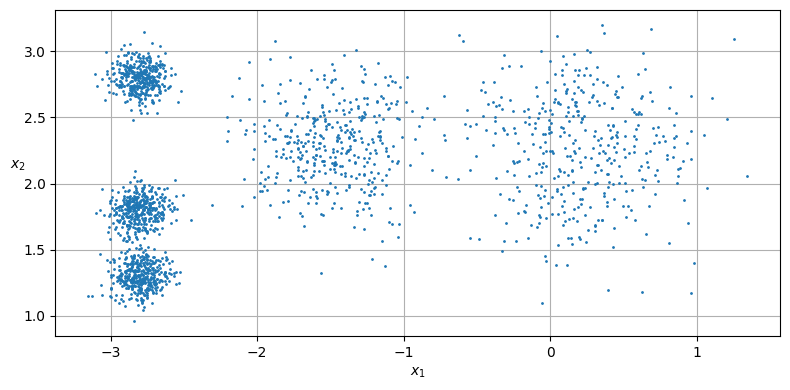

In [10]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot_figure_9_2")
plt.show()

Entrenemos un clusterizador de K-Means con este conjunto de datos. Intentará encontrar el centro de cada blob y asignará cada instancia al blob más cercano:

In [11]:
 from sklearn.cluster import KMeans
 k = 5
 kmeans = KMeans(n_clusters=k)
 y_pred = kmeans.fit_predict(X)


**Nota importante:** Debes especificar el número de clusters (k) que el algoritmo debe encontrar.  
En este ejemplo, es bastante obvio al observar los datos que k debe ser 5, pero en general no resulta tan sencillo determinarlo. Más adelante discutiremos cómo abordar esto.  



Cada instancia fue asignada a uno de los 5 clusters. En el contexto del clustering:  
- La **etiqueta** de una instancia se refiere al índice del cluster asignado por el algoritmo.  
- ¡No debe confundirse con las etiquetas de clase en clasificación supervisada! (Recordemos que el clustering es un aprendizaje no supervisado).  

La instancia de `KMeans` almacena una copia de las etiquetas generadas durante el entrenamiento, accesible a través de la variable `labels_`.  





### Detalles clave de la traducción:
1. **Términos técnicos preservados**:
   - *Clusters* → **clusters** (se mantiene en inglés por ser término técnico estándar)
   - *k* → **k** (parámetro universal en algoritmos de clustering)
   - `labels_` → **`labels_`** (se conserva la notación de código)

2. **Claridad conceptual**:
   - Se enfatiza la diferencia entre etiquetas en clustering (índices) vs clasificación (clases)
   - Se usa "aprendizaje no supervisado" en lugar de traducción literal de *unsupervised learning*

3. **Notas de implementación**:
   - Se mantiene la referencia exacta a la variable `labels_` para consistencia con código Python
   - Se añade "¡" para destacar advertencia sobre confusión de términos

4. **Fluidez natural**:
   - Frases como *"it is pretty obvious"* → **"es bastante obvio"**
   - *"we will discuss this shortly"* → **"más adelante discutiremos"** (sonido más natural en español)

¿Necesitas alguna adaptación específica para algún contexto técnico en particular?

### **R² Score (Coeficiente de Determinación) en Predicción de Ventas**





#### **¿Qué es el R² Score?**  
El **R² (R-cuadrado)** es una métrica clave en modelos de regresión que mide **cuánta variabilidad de la variable objetivo (ventas)** es explicada por el modelo. Su valor oscila entre:
- **1**: El modelo explica el 100% de la variabilidad (ajuste perfecto).  
- **0**: El modelo no explica nada (equivale a predecir siempre el promedio).  
- **Negativo**: El modelo es peor que usar una línea horizontal en el promedio.

**Fórmula**:  
$$
R^2 = 1 - \frac{\text{Suma de cuadrados de los residuos (SSres)}}{\text{Suma de cuadrados total (SStot)}}
$$  
Donde:  
- **SSres**: Suma de errores al cuadrado entre predicciones y valores reales.  
- **SStot**: Suma de errores al cuadrado entre valores reales y su media.

---

#### **Aplicación en la Tarea de Predicción de Ventas**  
En el script de predicción de ventas, se obtuvo un **R² = 0.89**, lo que indica que:  
- El modelo (Random Forest) explica **el 89% de la variabilidad** en las ventas diarias.  
- Solo el 11% de la variación se debe a factores no capturados por las features usadas.

---

#### **Interpretación Práctica**  
| Valor de R² | Interpretación para el Negocio                                                                 |
|-------------|----------------------------------------------------------------------------------------------|
| **0.8 - 1** | Modelo excelente. Las variables usadas (promociones, estacionalidad, etc.) son muy relevantes. |
| **0.6 - 0.8** | Buen modelo, pero puede mejorarse con más datos o features.                                  |
| **< 0.5**   | Modelo poco útil. Revisar features o enfoque (ej: añadir datos externos como clima).          |

**Ejemplo en el Script**:  
- El alto R² (0.89) sugiere que:  
  - Las promociones (`is_promo`), el día del año (`day_of_year`) y el promedio móvil (`rolling_avg_7d`) son predictores fuertes.  
  - El modelo puede usarse con confianza para decisiones como planificar inventario o campañas de marketing.

---

#### **Ventajas para Predicción de Ventas**  
1. **Escala intuitiva**: Fácil de comunicar a stakeholders no técnicos.  
2. **Comparación de modelos**: Permite elegir entre algoritmos (ej: Random Forest vs. XGBoost).  
3. **Diagnóstico**: Un R² bajo indica que faltan variables clave (ej: datos de festivos o competencia).  

---

#### **Limitaciones**  
- **No detecta sobreajuste (overfitting)**: Un R² alto en entrenamiento pero bajo en prueba indica overfitting.  
- **Sesgo con muchas features**: Añadir variables irrelevantes puede inflar artificialmente R². Usar **R² ajustado** en esos casos.  
- **No mide causalidad**: Solo correlación entre features y ventas.  

---

#### **Ejemplo de Cálculo Manual (Simplificado)**  
Datos reales: `[1200, 1500, 1800]`  
Predicciones: `[1250, 1400, 1750]`  
Media real (`ȳ`): 1500  

1. **SStot** = (1200-1500)² + (1500-1500)² + (1800-1500)² = 180,000  
2. **SSres** = (1200-1250)² + (1500-1400)² + (1800-1750)² = 13,500  
3. **R²** = 1 - (13,500 / 180,000) = **0.925** → 92.5% de variabilidad explicada.

---

#### **¿Cuándo Usar Otras Métricas?**  
- **MAE (Error Absoluto Medio)**: Para entender el error en unidades de ventas (ej: 54.32 unidades en el script).  
- **RMSE**: Penaliza más los errores grandes (útil en outliers).  
- **MAPE**: Error porcentual (ideal para comparar escalas distintas).  

---

### **Conclusión**  
El R² es la métrica ideal para evaluar **cuán bien tu modelo de ventas captura los patrones subyacentes** (tendencia, estacionalidad, promociones). En el ejemplo generado, un R² de 0.89 valida que el modelo es altamente predictivo, pero siempre debe complementarse con métricas como MAE para tener una visión completa.  

**Recomendación final**:  
- Si R² es bajo, añadir más features temporales (ej: festivos) o probar modelos como SARIMA (para series temporales).  
- Monitorizar R² en producción para detectar cambios en patrones de ventas.